In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
station = Base.classes.station

In [14]:
measurement = Base.classes.measurement

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [16]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
# Find the most recent date in the data set.
results_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date = results_date[0]
most_recent_date

'2017-08-23'

    Design a query to retrieve the last 12 months of precipitation data and plot the results. 
    Starting from the most recent data point in the database. 


In [18]:
# converting the string date into datime
most_recent_date_time = datetime.strptime(most_recent_date, '%Y-%m-%d')
most_recent_date_time

datetime.datetime(2017, 8, 23, 0, 0)

In [19]:
# Calculate the date one year from the last date in data set.
# substracting 365 days (12 months) out of the most recent year
year_before = most_recent_date_time - timedelta(days = 365 )
year_before

datetime.datetime(2016, 8, 23, 0, 0)

In [20]:
# Query to retrieve the data and precipitation scores
precip_back12moths_query =session.query(measurement.date, measurement.prcp).order_by(measurement.date.asc()).\
        filter(measurement.date>=year_before).all()

In [21]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
dates_precipitation_df = pd.DataFrame(precip_back12moths_query, columns = ["Dates", "Precipitation"])
dates_precipitation_df

,Dates,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [22]:
# Sort the dataframe by date
df2 = dates_precipitation_df.sort_values(by="Dates")
df2

,Dates,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


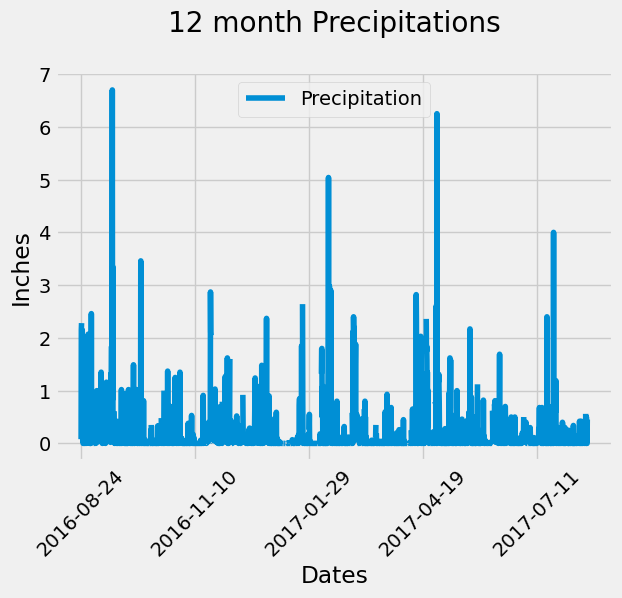

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data

df2.plot(x="Dates",
        y="Precipitation",
        title="12 month Precipitations\n",
        ylabel="Inches")
plt.xticks(rotation=45)
plt.show()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data

df2.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

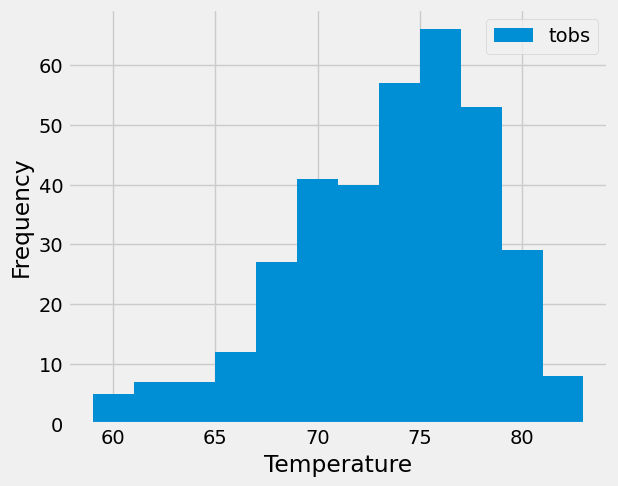

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()

In [55]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [78]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [79]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [80]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [59]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [60]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [61]:
# Save references to each table
station = Base.classes.station

In [62]:
measurement = Base.classes.measurement

In [63]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [64]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [72]:
# Find the most recent date in the data set.
results_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date = results_date[0]
most_recent_date

'2017-08-23'

    Design a query to retrieve the last 12 months of precipitation data and plot the results. 
    Starting from the most recent data point in the database. 


In [82]:
# converting the string date into datime
most_recent_date_time = datetime.strptime(most_recent_date, '%Y-%m-%d')
most_recent_date_time

datetime.datetime(2017, 8, 23, 0, 0)

In [88]:
# Calculate the date one year from the last date in data set.
# substracting 365 days (12 months) out of the most recent year
year_before = most_recent_date_time - timedelta(days = 365 )
year_before

datetime.datetime(2016, 8, 23, 0, 0)

In [89]:
# Query to retrieve the data and precipitation scores
precip_back12moths_query =session.query(measurement.date, measurement.prcp).order_by(measurement.date.asc()).\
        filter(measurement.date>=year_before).all()

In [95]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
dates_precipitation_df = pd.DataFrame(precip_back12moths_query, columns = ["Dates", "Precipitation"])
dates_precipitation_df

,Dates,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [100]:
# Sort the dataframe by date
df2 = dates_precipitation_df.sort_values(by="Dates")
df2

,Dates,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


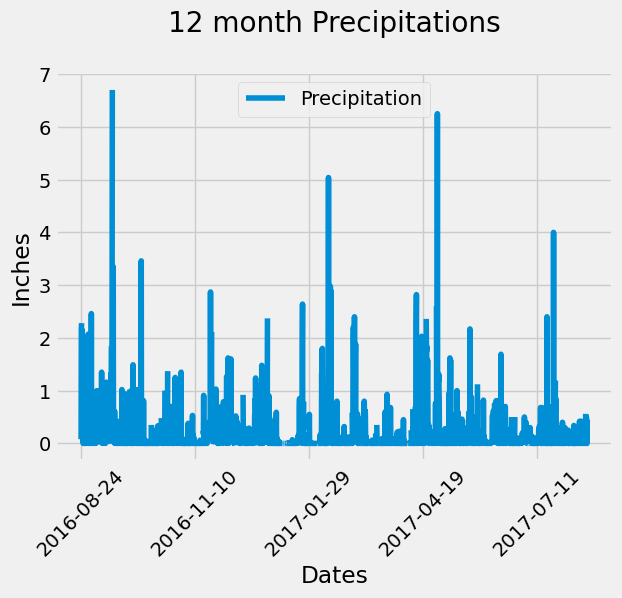

In [118]:
# Use Pandas Plotting with Matplotlib to plot the data

df2.plot(x="Dates",
        y="Precipitation",
        title="12 month Precipitations\n",
        ylabel="Inches")
plt.xticks(rotation=45)
plt.show()

In [120]:
# Use Pandas to calculate the summary statistics for the precipitation data

df2.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

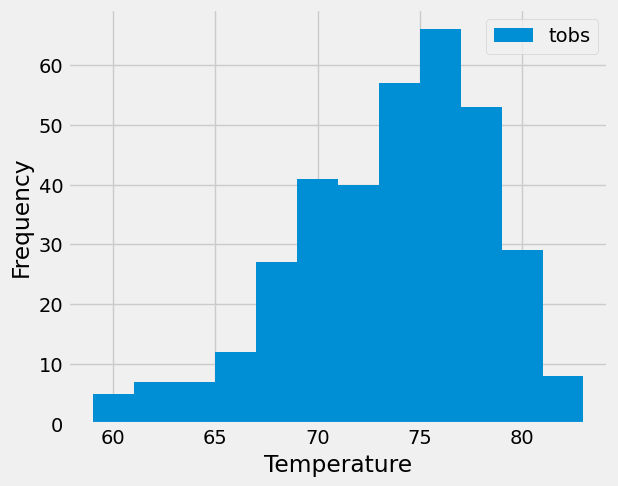

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()